In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install scikit-learn


In [4]:
import pandas as pd
file_path = '/content/drive/MyDrive/BBB dataset/B3DB_regression.tsv'
total = pd.read_csv(file_path, delimiter='\t', encoding='utf-8', on_bad_lines='skip')



In [5]:
total

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,Inchi,reference,group,comments
0,1,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,CN1C(=NN=N1)SCC2=C(N3C(C(C3=O)(NC(=O)C(C4=CC=C...,3889.0|,-2.52,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,R25|,A,NaN
1,2,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC6[C@...,18595497.0|,-2.15,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,R25|,A,NaN
2,3,morphine-6-glucuronide,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-9-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,9847115.0|,-2.09,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-5-13(31-2...,R25|,A,NaN
3,4,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,CC1=NC=C(C=C1)CC2CNC(NC2=O)NCCCCC3=NC=C(C=C3C)Br,74041479.0|,-1.88,InChI=1S/C21H28BrN5O/c1-14-9-18(22)13-25-19(14...,R35|,A,NaN
4,5,NaN,NaN,c1(c2c3n(c4c(C(N(C)C3)=O)c(Cl)ccc4)cn2)noc(C(O...,nan|,-1.82,"InChI=1S/C16H14ClN5O4/c1-16(24,25)15-19-13(20-...",R35|,A,NaN
...,...,...,...,...,...,...,...,...,...,...
1053,1054,2qju,"3-(5,6-dihydrobenzo[b][1]benzazepin-11-yl)prop...",C[NH2+]CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,2995.0|2995.0|2995.0|2995.0|2995.0|2995.0|2995...,1.20,InChI=1S/C18H22N2/c1-19-13-6-14-20-17-9-4-2-7-...,R4|R3|R38|R41|R43|R47|R49|R40|R8|R21|R27|R2|R2...,D,NaN
1054,1055,promazine,"n,n-dimethyl-3-phenothiazin-10-ylpropan-1-amine",CN(C)CCCN1C2=CC=CC=C2SC3=CC=CC=C31,4926.0|4926.0|4926.0|4926.0|4926.0|4926.0|4926...,1.23,InChI=1S/C17H20N2S/c1-18(2)12-7-13-19-14-8-3-5...,R3|R4|R50|R40|R38|R41|R8|R21|R27|R2|R2|R27|R3|...,D,NaN
1055,1056,diphenhydramine,"2-benzhydryloxy-n,n-dimethylethanamine",CN(C)CCOC(C1=CC=CC=C1)C2=CC=CC=C2,3100.0|3100.0|3100.0|3100.0|3100.0|3100.0|3100...,1.30,InChI=1S/C17H21NO/c1-18(2)13-14-19-17(15-9-5-3...,R42|R2|R2|R3|R8|R18|R21|R25|R26|R27|R27|R27|R3...,D,NaN
1056,1057,1225-64-5,3-(2-chlorophenothiazin-10-yl)-n-methylpropan-...,CNCCCN1C2=CC=CC=C2SC3=C1C=C(C=C3)Cl,62875.0|62875.0|62875.0|62875.0|62875.0|62875....,1.40,InChI=1S/C16H17ClN2S/c1-18-9-4-10-19-13-5-2-3-...,R18|R26|R27|R4|R11|R12|R20|R25|R35|R36|R39|R43...,D,NaN


In [6]:
!pip install rdkit-pypi
!pip install pandas
!pip install Pillow
!pip install matplotlib
!pip install pydot
!sudo apt-get -qq install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 45.5 MB/s eta 0:00:00


In [7]:
import os

# Temporary suppress tf logs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from rdkit import Chem
from rdkit import RDLogger
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolsToGridImage

# Temporary suppress warnings and RDKit logs
warnings.filterwarnings("ignore")
RDLogger.DisableLog("rdApp.*")

np.random.seed(42)
tf.random.set_seed(42)

In [8]:
class Featurizer:
    def __init__(self, allowable_sets):
        self.dim = 0
        self.features_mapping = {}
        for k, s in allowable_sets.items():
            s = sorted(list(s))
            self.features_mapping[k] = dict(zip(s, range(self.dim, len(s) + self.dim)))
            self.dim += len(s)

    def encode(self, inputs):
        output = np.zeros((self.dim,))
        for name_feature, feature_mapping in self.features_mapping.items():
            feature = getattr(self, name_feature)(inputs)
            if feature not in feature_mapping:
                continue
            output[feature_mapping[feature]] = 1.0
        return output


class AtomFeaturizer(Featurizer):
    def __init__(self, allowable_sets):
        super().__init__(allowable_sets)

    def symbol(self, atom):
        return atom.GetSymbol()

    def n_valence(self, atom):
        return atom.GetTotalValence()

    def n_hydrogens(self, atom):
        return atom.GetTotalNumHs()

    def hybridization(self, atom):
        return atom.GetHybridization().name.lower()



class BondFeaturizer(Featurizer):
    def __init__(self, allowable_sets):
        super().__init__(allowable_sets)
        self.dim += 1

    def encode(self, bond):
        output = np.zeros((self.dim,))
        if bond is None:
            output[-1] = 1.0
            return output
        output = super().encode(bond)
        return output

    def bond_type(self, bond):
        return bond.GetBondType().name.lower()

    def conjugated(self, bond):
        return bond.GetIsConjugated()


atom_featurizer = AtomFeaturizer(
    allowable_sets={
        "symbol": {"B", "Br", "C", "Ca", "Cl", "F", "H", "I", "N", "Na", "O", "P", "S"},
        "n_valence": {0, 1, 2, 3, 4, 5, 6},
        "n_hydrogens": {0, 1, 2, 3, 4},
        "hybridization": {"s", "sp", "sp2", "sp3"},
    }
)

bond_featurizer = BondFeaturizer(
    allowable_sets={
        "bond_type": {"single", "double", "triple", "aromatic"},
        "conjugated": {True, False},
    }
)


In [9]:

def molecule_from_smiles(smiles):
    # MolFromSmiles(m, sanitize=True) should be equivalent to
    # MolFromSmiles(m, sanitize=False) -> SanitizeMol(m) -> AssignStereochemistry(m, ...)
    molecule = Chem.MolFromSmiles(smiles, sanitize=False)

    # If sanitization is unsuccessful, catch the error, and try again without
    # the sanitization step that caused the error
    flag = Chem.SanitizeMol(molecule, catchErrors=True)
    if flag != Chem.SanitizeFlags.SANITIZE_NONE:
        Chem.SanitizeMol(molecule, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL ^ flag)

    Chem.AssignStereochemistry(molecule, cleanIt=True, force=True)
    return molecule


def graph_from_molecule(molecule):
    # Initialize graph
    atom_features = []
    bond_features = []
    pair_indices = []

    for atom in molecule.GetAtoms():
        atom_features.append(atom_featurizer.encode(atom))

        # Add self-loops
        pair_indices.append([atom.GetIdx(), atom.GetIdx()])
        bond_features.append(bond_featurizer.encode(None))

        for neighbor in atom.GetNeighbors():
            bond = molecule.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
            pair_indices.append([atom.GetIdx(), neighbor.GetIdx()])
            bond_features.append(bond_featurizer.encode(bond))

    return np.array(atom_features), np.array(bond_features), np.array(pair_indices)


def graphs_from_smiles(smiles_list):
    # Initialize graphs
    atom_features_list = []
    bond_features_list = []
    pair_indices_list = []

    for smiles in smiles_list:
        molecule = molecule_from_smiles(smiles)
        atom_features, bond_features, pair_indices = graph_from_molecule(molecule)

        atom_features_list.append(atom_features)
        bond_features_list.append(bond_features)
        pair_indices_list.append(pair_indices)

    # Convert lists to ragged tensors for tf.data.Dataset later on
    return (
        tf.ragged.constant(atom_features_list, dtype=tf.float32),
        tf.ragged.constant(bond_features_list, dtype=tf.float32),
        tf.ragged.constant(pair_indices_list, dtype=tf.int64),
    )


# Shuffle array of indices ranging from 0 to 2049
permuted_indices = np.random.permutation(np.arange(total.shape[0]))

# Train set: 80 % of data
train_index = permuted_indices[: int(total.shape[0] * 0.8)]
x_train = graphs_from_smiles(total.iloc[train_index].SMILES)
y_train = total.iloc[train_index].logBB

# Valid set: 19 % of data
valid_index = permuted_indices[int(total.shape[0] * 0.8) : int(total.shape[0] * 0.99)]
x_valid = graphs_from_smiles(total.iloc[valid_index].SMILES)
y_valid = total.iloc[valid_index].logBB

# Test set: 1 % of data
test_index = permuted_indices[int(total.shape[0] * 0.99) :]
x_test = graphs_from_smiles(total.iloc[test_index].SMILES)
y_test = total.iloc[test_index].logBB

SMILES:	C[C@H](C1=CC=C(C=C1)CC(C)C)C(=O)O
LogBB:	-0.18
Molecule:


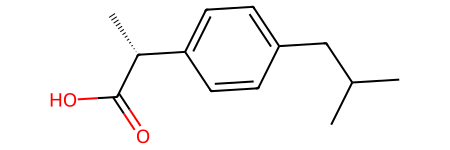

In [10]:
print(f"SMILES:\t{total.SMILES[100]}\nLogBB:\t{total.logBB[100]}")
molecule = molecule_from_smiles(total.iloc[100].SMILES)
print("Molecule:")
molecule

In [11]:
graph = graph_from_molecule(molecule)
print("Graph (including self-loops):")
print("\tatom features\t", graph[0].shape)
print("\tbond features\t", graph[1].shape)
print("\tpair indices\t", graph[2].shape)

Graph (including self-loops):
	atom features	 (15, 29)
	bond features	 (45, 7)
	pair indices	 (45, 2)


In [12]:
def prepare_batch(x_batch, y_batch):
    """Merges (sub)graphs of batch into a single global (disconnected) graph
    """

    atom_features, bond_features, pair_indices = x_batch

    # Obtain number of atoms and bonds for each graph (molecule)
    num_atoms = atom_features.row_lengths()
    num_bonds = bond_features.row_lengths()

    # Obtain partition indices (molecule_indicator), which will be used to
    # gather (sub)graphs from global graph in model later on
    molecule_indices = tf.range(len(num_atoms))
    molecule_indicator = tf.repeat(molecule_indices, num_atoms)

    # Merge (sub)graphs into a global (disconnected) graph. Adding 'increment' to
    # 'pair_indices' (and merging ragged tensors) actualizes the global graph
    gather_indices = tf.repeat(molecule_indices[:-1], num_bonds[1:])
    increment = tf.cumsum(num_atoms[:-1])
    increment = tf.pad(tf.gather(increment, gather_indices), [(num_bonds[0], 0)])
    pair_indices = pair_indices.merge_dims(outer_axis=0, inner_axis=1).to_tensor()
    pair_indices = pair_indices + increment[:, tf.newaxis]
    atom_features = atom_features.merge_dims(outer_axis=0, inner_axis=1).to_tensor()
    bond_features = bond_features.merge_dims(outer_axis=0, inner_axis=1).to_tensor()

    return (atom_features, bond_features, pair_indices, molecule_indicator), y_batch


def MPNNDataset(X, y, batch_size=32, shuffle=False):
    dataset = tf.data.Dataset.from_tensor_slices((X, (y)))
    if shuffle:
        dataset = dataset.shuffle(1024)
    return dataset.batch(batch_size).map(prepare_batch, -1).prefetch(-1)

In [13]:
class EdgeNetwork(layers.Layer):
    def build(self, input_shape):
        self.atom_dim = input_shape[0][-1]
        self.bond_dim = input_shape[1][-1]
        self.kernel = self.add_weight(
            shape=(self.bond_dim, self.atom_dim * self.atom_dim),
            initializer="glorot_uniform",
            name="kernel",
        )
        self.bias = self.add_weight(
            shape=(self.atom_dim * self.atom_dim), initializer="zeros", name="bias",
        )
        self.built = True

    def call(self, inputs):
        atom_features, bond_features, pair_indices = inputs

        # Apply linear transformation to bond features
        bond_features = tf.matmul(bond_features, self.kernel) + self.bias

        # Reshape for neighborhood aggregation later
        bond_features = tf.reshape(bond_features, (-1, self.atom_dim, self.atom_dim))

        # Obtain atom features of neighbors
        atom_features_neighbors = tf.gather(atom_features, pair_indices[:, 1])
        atom_features_neighbors = tf.expand_dims(atom_features_neighbors, axis=-1)

        # Apply neighborhood aggregation
        transformed_features = tf.matmul(bond_features, atom_features_neighbors)
        transformed_features = tf.squeeze(transformed_features, axis=-1)
        aggregated_features = tf.math.unsorted_segment_sum(
            transformed_features,
            pair_indices[:, 0],
            num_segments=tf.shape(atom_features)[0],
        )
        return aggregated_features


class MessagePassing(layers.Layer):
    def __init__(self, units, steps=4, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.steps = steps

    def build(self, input_shape):
        self.atom_dim = input_shape[0][-1]
        self.message_step = EdgeNetwork()
        self.pad_length = max(0, self.units - self.atom_dim)
        self.update_step = layers.GRUCell(self.atom_dim + self.pad_length)
        self.built = True

    def call(self, inputs):
        atom_features, bond_features, pair_indices = inputs

        # Pad atom features if number of desired units exceeds atom_features dim.
        # Alternatively, a dense layer could be used here.
        atom_features_updated = tf.pad(atom_features, [(0, 0), (0, self.pad_length)])

        # Perform a number of steps of message passing
        for i in range(self.steps):
            # Aggregate information from neighbors
            atom_features_aggregated = self.message_step(
                [atom_features_updated, bond_features, pair_indices]
            )

            # Update node state via a step of GRU
            atom_features_updated, _ = self.update_step(
                atom_features_aggregated, atom_features_updated
            )
        return atom_features_updated


In [14]:
class PartitionPadding(layers.Layer):
    def __init__(self, batch_size, **kwargs):
        super().__init__(**kwargs)
        self.batch_size = batch_size

    def call(self, inputs):

        atom_features, molecule_indicator = inputs

        # Obtain subgraphs
        atom_features_partitioned = tf.dynamic_partition(
            atom_features, molecule_indicator, self.batch_size
        )

        # Pad and stack subgraphs
        num_atoms = [tf.shape(f)[0] for f in atom_features_partitioned]
        max_num_atoms = tf.reduce_max(num_atoms)
        atom_features_stacked = tf.stack(
            [
                tf.pad(f, [(0, max_num_atoms - n), (0, 0)])
                for f, n in zip(atom_features_partitioned, num_atoms)
            ],
            axis=0,
        )

        # Remove empty subgraphs (usually for last batch in dataset)
        gather_indices = tf.where(tf.reduce_sum(atom_features_stacked, (1, 2)) != 0)
        gather_indices = tf.squeeze(gather_indices, axis=-1)
        return tf.gather(atom_features_stacked, gather_indices, axis=0)


class TransformerEncoderReadout(layers.Layer):
    def __init__(
        self, num_heads=8, embed_dim=64, dense_dim=512, batch_size=32, **kwargs
    ):
        super().__init__(**kwargs)

        self.partition_padding = PartitionPadding(batch_size)
        self.attention = layers.MultiHeadAttention(num_heads, embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.average_pooling = layers.GlobalAveragePooling1D()

    def call(self, inputs):
        x = self.partition_padding(inputs)
        padding_mask = tf.reduce_any(tf.not_equal(x, 0.0), axis=-1)
        padding_mask = padding_mask[:, tf.newaxis, tf.newaxis, :]
        attention_output = self.attention(x, x, attention_mask=padding_mask)
        proj_input = self.layernorm_1(x + attention_output)
        proj_output = self.layernorm_2(proj_input + self.dense_proj(proj_input))
        return self.average_pooling(proj_output)

In [ ]:
# MAE:
mpnn.compile(
    loss=keras.losses.MeanAbsoluteError(),
    optimizer=keras.optimizers.Adam(learning_rate=5e-4),
    metrics=[keras.metrics.MeanAbsoluteError(name="MAE")],
)

In [ ]:
# MSE
mpnn.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=5e-4),
    metrics=[keras.metrics.MeanAbsoluteError(name="MAE")],
)

In [19]:
#MBE
import tensorflow as tf
from tensorflow import keras

def mean_bias_error(y_true, y_pred):
    return tf.abs(tf.reduce_mean(y_pred - y_true))



In [26]:
#RSE
def relative_squared_error_loss(y_true, y_pred):
    y_true = tf.cast(y_true, y_pred.dtype)
    numerator = tf.reduce_sum(tf.square(y_true - y_pred))
    denominator = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return numerator / denominator

In [36]:
#mse+regularization
def custom_loss_2(y_true, y_pred):
    epsilon = 1e-7  # Small epsilon to avoid division by zero
    percentage_error = tf.abs((y_true - y_pred) / (y_true + epsilon))
    return tf.reduce_mean(percentage_error)

In [ ]:
#MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = tf.cast(y_true, y_pred.dtype)
    return tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
#RMSE

In [51]:
import tensorflow as tf
from tensorflow.keras import backend as K

def custom_loss_function(y_true, y_pred):
    mse = K.mean(K.square(y_true - y_pred), axis=-1)
    mae = K.mean(K.abs(y_true - y_pred), axis=-1)
    return mse + mae


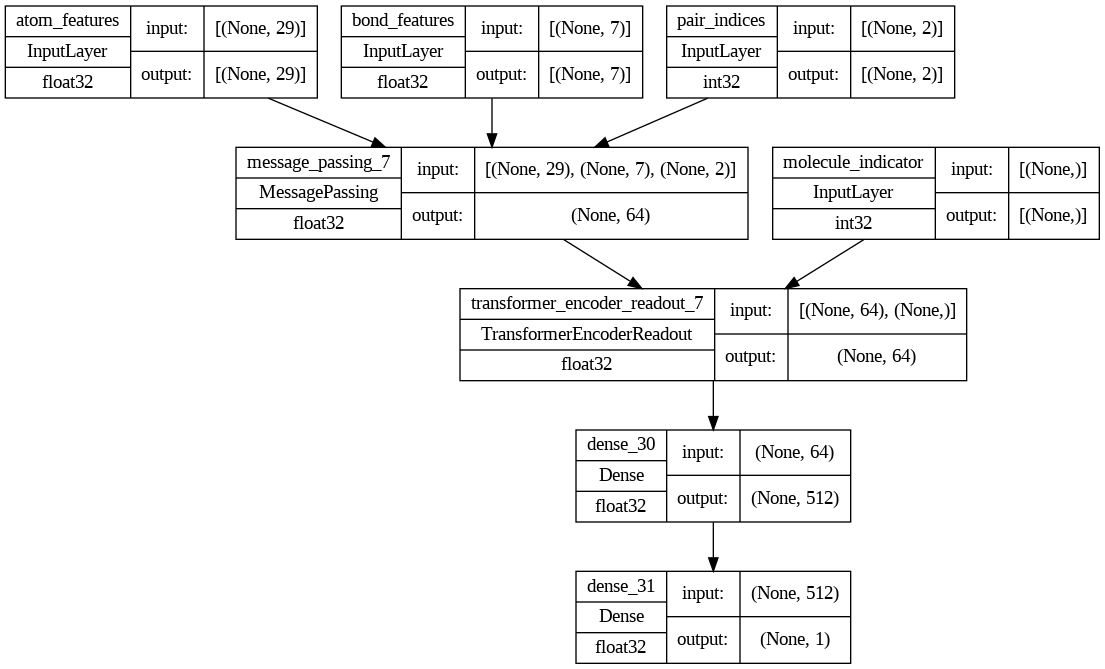

In [52]:
def MPNNModel(
    atom_dim,
    bond_dim,
    batch_size=32,
    message_units=64,
    message_steps=4,
    num_attention_heads=8,
    dense_units=512,
):

    atom_features = layers.Input((atom_dim), dtype="float32", name="atom_features")
    bond_features = layers.Input((bond_dim), dtype="float32", name="bond_features")
    pair_indices = layers.Input((2), dtype="int32", name="pair_indices")
    molecule_indicator = layers.Input((), dtype="int32", name="molecule_indicator")

    x = MessagePassing(message_units, message_steps)(
        [atom_features, bond_features, pair_indices]
    )

    x = TransformerEncoderReadout(
        num_attention_heads, message_units, dense_units, batch_size
    )([x, molecule_indicator])

    x = layers.Dense(dense_units, activation="relu")(x)
    x = layers.Dense(1, activation=None)(x)

    model = keras.Model(
        inputs=[atom_features, bond_features, pair_indices, molecule_indicator],
        outputs=[x],
    )
    return model


mpnn = MPNNModel(
    atom_dim=x_train[0][0][0].shape[0], bond_dim=x_train[1][0][0].shape[0],
)

mpnn.compile(
    loss=custom_loss_function,
    optimizer=keras.optimizers.Adam(learning_rate=5e-4),
    metrics=[keras.metrics.MeanAbsoluteError(name="MAE")],
)

keras.utils.plot_model(mpnn, show_dtype=True, show_shapes=True)

In [48]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [49]:
# TEST 1:

TEST 1
Epoch 1/40
27/27 - 22s - loss: 1.2250 - MAE: 0.6166 - val_loss: 1.0085 - val_MAE: 0.5210 - 22s/epoch - 798ms/step
Epoch 2/40
27/27 - 14s - loss: 0.9379 - MAE: 0.5126 - val_loss: 0.9475 - val_MAE: 0.5022 - 14s/epoch - 510ms/step
Epoch 3/40
27/27 - 13s - loss: 0.9462 - MAE: 0.5170 - val_loss: 0.9105 - val_MAE: 0.4815 - 13s/epoch - 483ms/step
Epoch 4/40
27/27 - 14s - loss: 0.8678 - MAE: 0.4876 - val_loss: 0.9018 - val_MAE: 0.4862 - 14s/epoch - 525ms/step
Epoch 5/40
27/27 - 13s - loss: 0.8798 - MAE: 0.4904 - val_loss: 0.9206 - val_MAE: 0.4830 - 13s/epoch - 471ms/step
Epoch 6/40
27/27 - 14s - loss: 0.9135 - MAE: 0.5036 - val_loss: 1.0946 - val_MAE: 0.5440 - 14s/epoch - 517ms/step
Epoch 7/40
27/27 - 15s - loss: 0.9698 - MAE: 0.5254 - val_loss: 0.9577 - val_MAE: 0.5032 - 15s/epoch - 565ms/step
Epoch 8/40
27/27 - 14s - loss: 0.8854 - MAE: 0.4868 - val_loss: 0.8695 - val_MAE: 0.4655 - 14s/epoch - 526ms/step
Epoch 9/40
27/27 - 12s - loss: 0.8106 - MAE: 0.4549 - val_loss: 0.9071 - val_MAE:

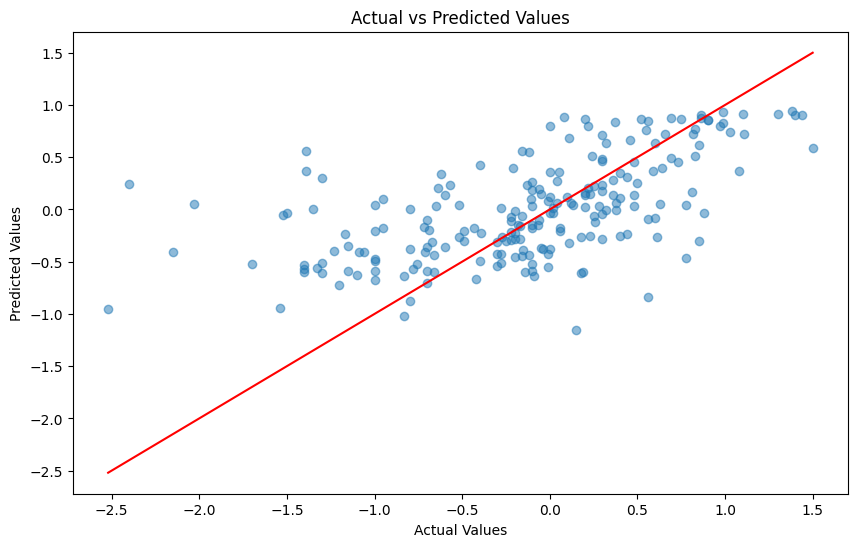

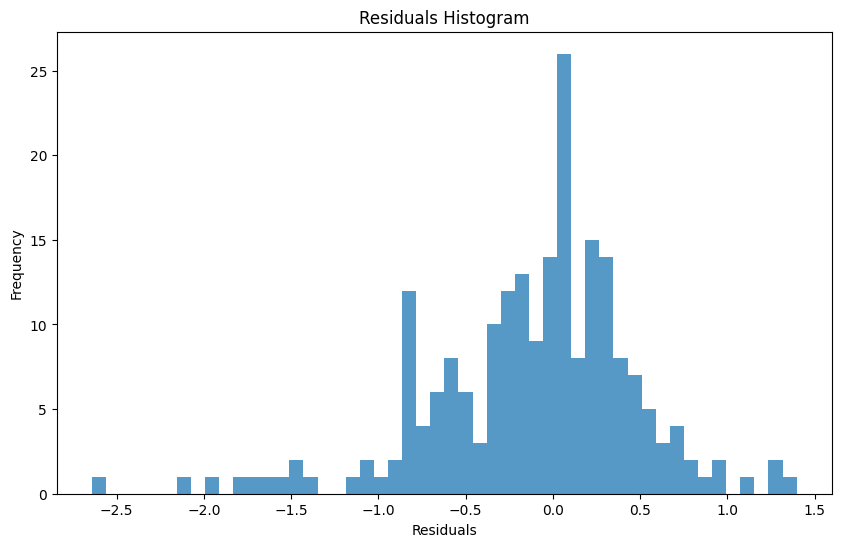

TEST 2
Epoch 1/40
27/27 - 14s - loss: 0.7585 - MAE: 0.4300 - val_loss: 0.8507 - val_MAE: 0.4782 - 14s/epoch - 526ms/step
Epoch 2/40
27/27 - 14s - loss: 0.7636 - MAE: 0.4373 - val_loss: 0.8432 - val_MAE: 0.4766 - 14s/epoch - 516ms/step
Epoch 3/40
27/27 - 14s - loss: 0.7370 - MAE: 0.4242 - val_loss: 0.8427 - val_MAE: 0.4716 - 14s/epoch - 520ms/step
Epoch 4/40
27/27 - 13s - loss: 0.7399 - MAE: 0.4256 - val_loss: 0.8415 - val_MAE: 0.4743 - 13s/epoch - 483ms/step
Epoch 5/40
27/27 - 14s - loss: 0.7262 - MAE: 0.4193 - val_loss: 0.8549 - val_MAE: 0.4752 - 14s/epoch - 527ms/step
Epoch 6/40
27/27 - 15s - loss: 0.7131 - MAE: 0.4121 - val_loss: 0.8593 - val_MAE: 0.4805 - 15s/epoch - 539ms/step
Epoch 7/40
27/27 - 14s - loss: 0.7332 - MAE: 0.4226 - val_loss: 0.8747 - val_MAE: 0.4823 - 14s/epoch - 535ms/step
Epoch 8/40
27/27 - 14s - loss: 0.7097 - MAE: 0.4118 - val_loss: 0.8611 - val_MAE: 0.4780 - 14s/epoch - 511ms/step
Epoch 9/40
27/27 - 14s - loss: 0.6797 - MAE: 0.3976 - val_loss: 0.8115 - val_MAE:

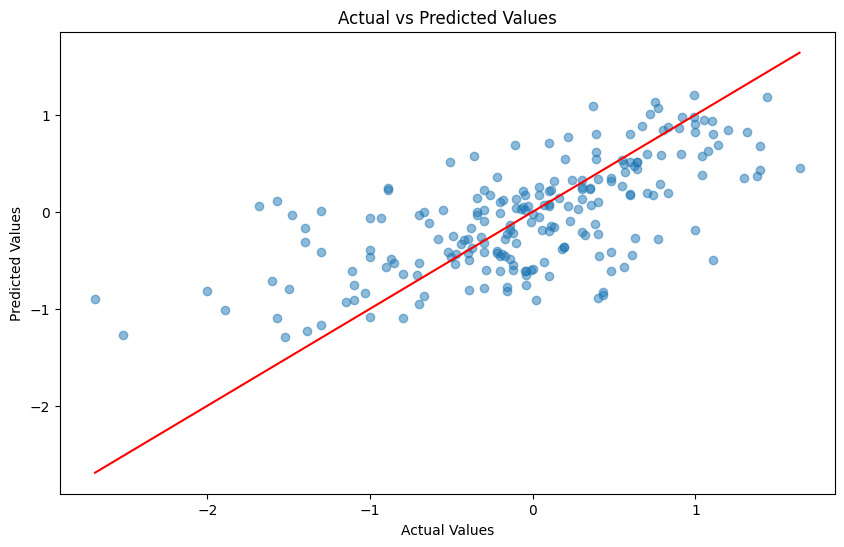

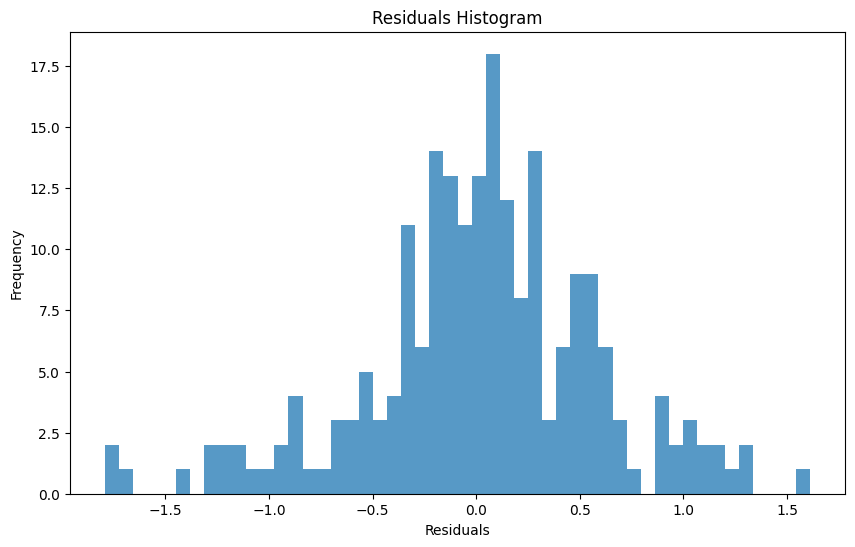

TEST 3
Epoch 1/40
27/27 - 14s - loss: 0.6483 - MAE: 0.3844 - val_loss: 0.5988 - val_MAE: 0.3663 - 14s/epoch - 508ms/step
Epoch 2/40
27/27 - 14s - loss: 0.6483 - MAE: 0.3808 - val_loss: 0.6230 - val_MAE: 0.3848 - 14s/epoch - 512ms/step
Epoch 3/40
27/27 - 14s - loss: 0.6000 - MAE: 0.3613 - val_loss: 0.6074 - val_MAE: 0.3681 - 14s/epoch - 527ms/step
Epoch 4/40
27/27 - 14s - loss: 0.5642 - MAE: 0.3450 - val_loss: 0.6173 - val_MAE: 0.3714 - 14s/epoch - 514ms/step
Epoch 5/40
27/27 - 14s - loss: 0.5763 - MAE: 0.3507 - val_loss: 0.5774 - val_MAE: 0.3509 - 14s/epoch - 519ms/step
Epoch 6/40
27/27 - 13s - loss: 0.5569 - MAE: 0.3403 - val_loss: 0.6066 - val_MAE: 0.3650 - 13s/epoch - 485ms/step
Epoch 7/40
27/27 - 13s - loss: 0.5473 - MAE: 0.3403 - val_loss: 0.6064 - val_MAE: 0.3666 - 13s/epoch - 493ms/step
Epoch 8/40
27/27 - 14s - loss: 0.5529 - MAE: 0.3386 - val_loss: 0.6933 - val_MAE: 0.4105 - 14s/epoch - 527ms/step
Epoch 9/40
27/27 - 14s - loss: 0.5522 - MAE: 0.3387 - val_loss: 0.6302 - val_MAE:

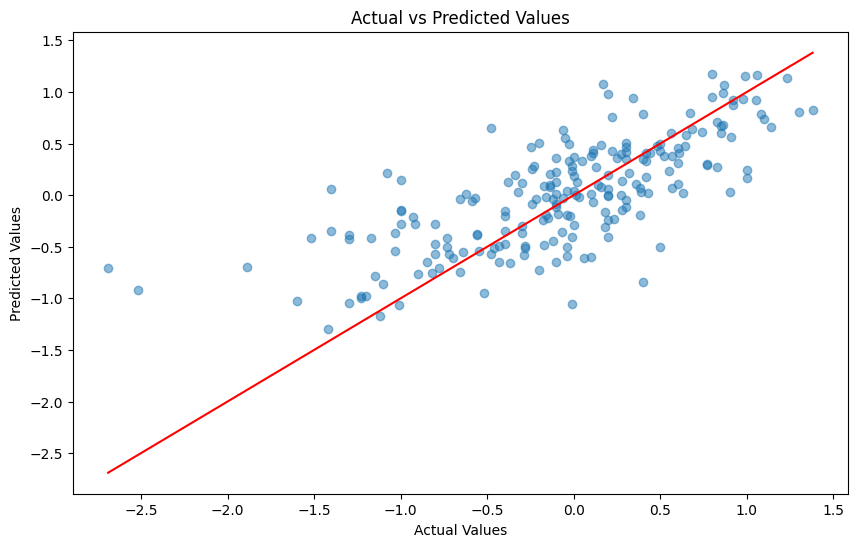

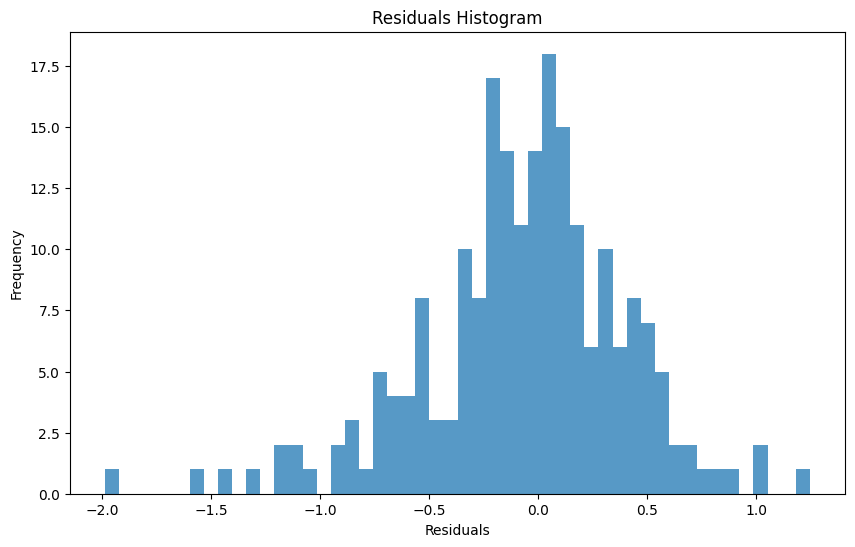

TEST 4
Epoch 1/40
27/27 - 14s - loss: 0.5915 - MAE: 0.3607 - val_loss: 0.5686 - val_MAE: 0.3491 - 14s/epoch - 535ms/step
Epoch 2/40
27/27 - 14s - loss: 0.5851 - MAE: 0.3569 - val_loss: 0.5659 - val_MAE: 0.3525 - 14s/epoch - 529ms/step
Epoch 3/40
27/27 - 14s - loss: 0.5498 - MAE: 0.3427 - val_loss: 0.5262 - val_MAE: 0.3255 - 14s/epoch - 531ms/step
Epoch 4/40
27/27 - 14s - loss: 0.5277 - MAE: 0.3298 - val_loss: 0.5524 - val_MAE: 0.3397 - 14s/epoch - 530ms/step
Epoch 5/40
27/27 - 14s - loss: 0.5207 - MAE: 0.3268 - val_loss: 0.6177 - val_MAE: 0.3746 - 14s/epoch - 503ms/step
Epoch 6/40
27/27 - 15s - loss: 0.5135 - MAE: 0.3240 - val_loss: 0.5645 - val_MAE: 0.3498 - 15s/epoch - 549ms/step
Epoch 7/40
27/27 - 14s - loss: 0.5017 - MAE: 0.3187 - val_loss: 0.7096 - val_MAE: 0.4149 - 14s/epoch - 528ms/step
Epoch 8/40
27/27 - 15s - loss: 0.4836 - MAE: 0.3085 - val_loss: 0.5850 - val_MAE: 0.3526 - 15s/epoch - 544ms/step
27/27 [==============================] - 6s 209ms/step - loss: 0.5094 - MAE: 0.32

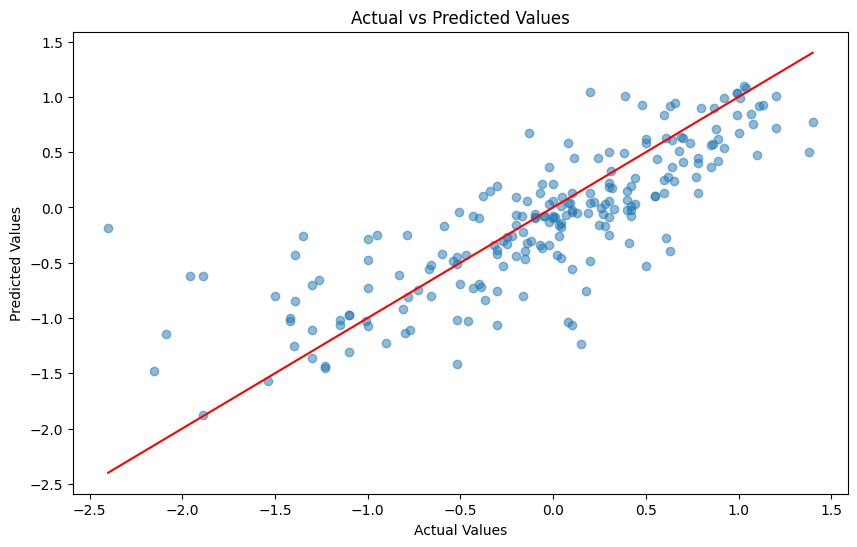

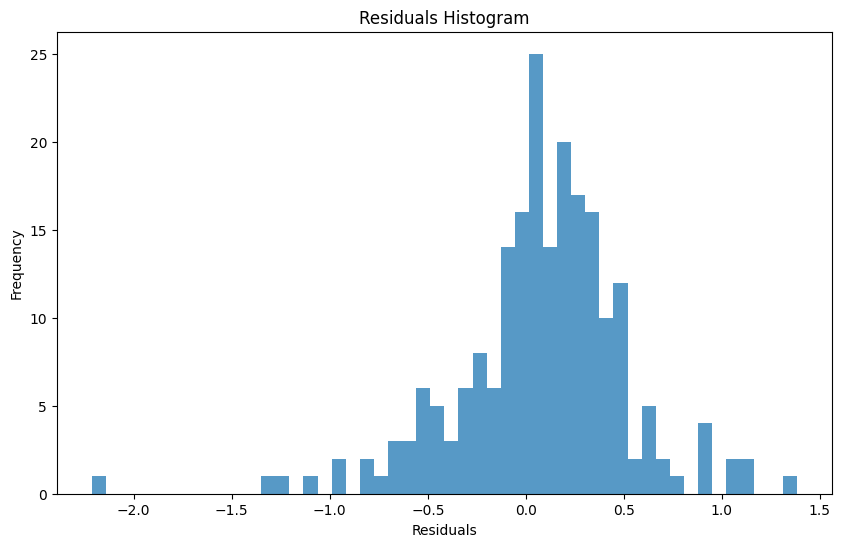

TEST 5
Epoch 1/40
27/27 - 14s - loss: 0.5610 - MAE: 0.3430 - val_loss: 0.5750 - val_MAE: 0.3643 - 14s/epoch - 525ms/step
Epoch 2/40
27/27 - 14s - loss: 0.5891 - MAE: 0.3630 - val_loss: 0.5591 - val_MAE: 0.3527 - 14s/epoch - 505ms/step
Epoch 3/40
27/27 - 14s - loss: 0.5256 - MAE: 0.3295 - val_loss: 0.5499 - val_MAE: 0.3521 - 14s/epoch - 537ms/step
Epoch 4/40
27/27 - 14s - loss: 0.5232 - MAE: 0.3285 - val_loss: 0.5951 - val_MAE: 0.3666 - 14s/epoch - 520ms/step
Epoch 5/40
27/27 - 13s - loss: 0.5328 - MAE: 0.3313 - val_loss: 0.6115 - val_MAE: 0.3722 - 13s/epoch - 491ms/step
Epoch 6/40
27/27 - 14s - loss: 0.4962 - MAE: 0.3144 - val_loss: 0.5551 - val_MAE: 0.3476 - 14s/epoch - 517ms/step
Epoch 7/40
27/27 - 14s - loss: 0.4676 - MAE: 0.2990 - val_loss: 0.5585 - val_MAE: 0.3539 - 14s/epoch - 518ms/step
Epoch 8/40
27/27 - 14s - loss: 0.4540 - MAE: 0.2941 - val_loss: 0.5530 - val_MAE: 0.3503 - 14s/epoch - 520ms/step
27/27 [==============================] - 5s 165ms/step - loss: 0.4727 - MAE: 0.30

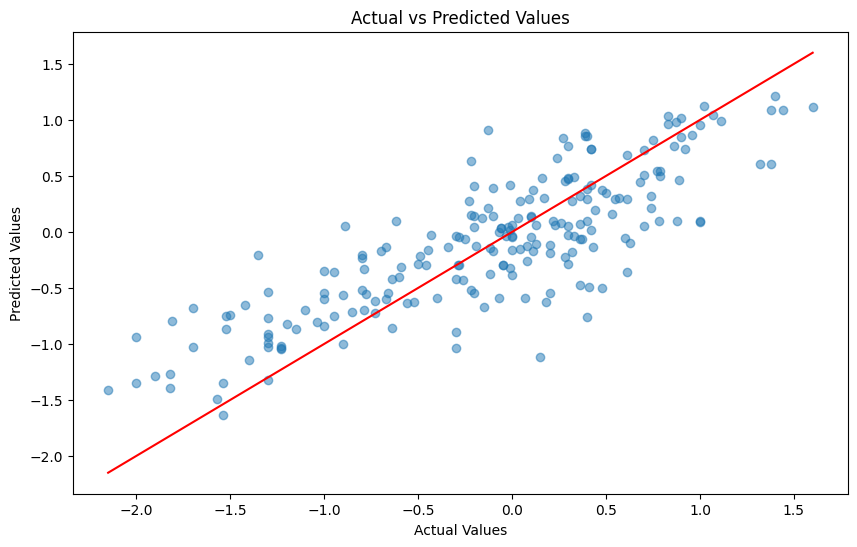

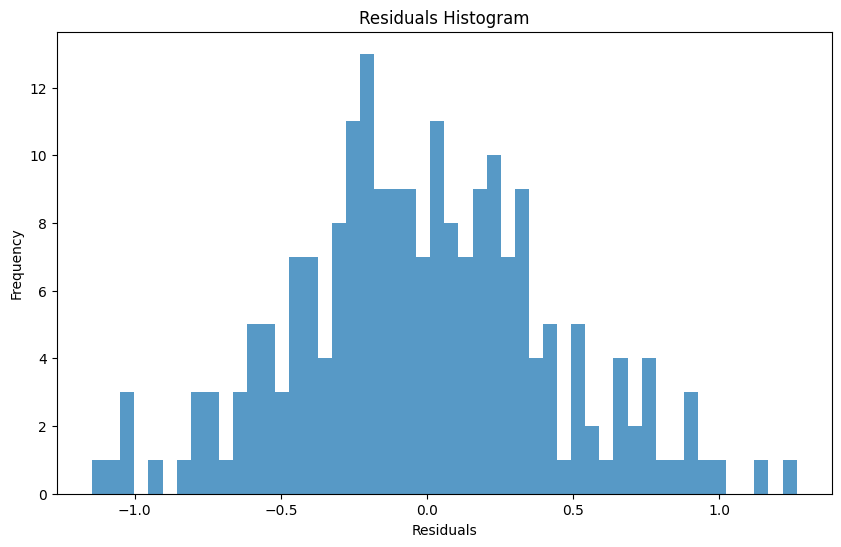

In [53]:
for i in range(5):
  print("TEST",i+1)
  permuted_indices = np.random.permutation(np.arange(total.shape[0]))

  # Train set: 80 % of data
  train_index = permuted_indices[: int(total.shape[0] * 0.8)]
  x_train = graphs_from_smiles(total.iloc[train_index].SMILES)
  y_train = total.iloc[train_index].logBB

  # Valid set: 20 % of data
  valid_index = permuted_indices[int(total.shape[0] * 0.8) : ]
  x_valid = graphs_from_smiles(total.iloc[valid_index].SMILES)
  y_valid = total.iloc[valid_index].logBB

  train_dataset = MPNNDataset(x_train, y_train)
  valid_dataset = MPNNDataset(x_valid, y_valid)

  early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

  history = mpnn.fit(
      train_dataset,
      validation_data=valid_dataset,
      epochs=40,
      verbose=2,
      callbacks=[early_stopping]
  )

  train_predictions = mpnn.predict(train_dataset)
  train_loss, train_mae = mpnn.evaluate(train_dataset)
  print(f"Train MAE: {train_mae}")

  r2_train = r2_score(y_train, train_predictions)
  print(f"Training R-squared: {r2_train}")

  molecules = [molecule_from_smiles(total.SMILES.values[index]) for index in valid_index]
  y_true = [total.logBB.values[index] for index in valid_index]
  y_pred = tf.squeeze(mpnn.predict(valid_dataset), axis=1)

  legends = [f"y_true/y_pred = {y_true[i]}/{y_pred[i]:.2f}" for i in range(len(y_true))]
  print(MolsToGridImage(molecules, molsPerRow=4, legends=legends))

  valid_dataset = MPNNDataset(x_valid, y_valid)
  test_loss, test_mae = mpnn.evaluate(valid_dataset)
  print(f"Test Loss: {test_loss}")
  print(f"Test MAE: {test_mae}")

  predictions = mpnn.predict(valid_dataset)
  r2 = r2_score(y_valid, predictions)
  print(f"R^2 Score: {r2}")

  # Load the test dataset and make predictions
  test_dataset = MPNNDataset(x_valid, y_valid)
  y_pred = mpnn.predict(valid_dataset)

  # Ensure y_test and y_pred are numpy arrays
  y_test = np.array(y_valid)
  y_pred = np.array(y_pred).squeeze()  # Remove the extra dimension if it exists

  # Check the shape of y_test and y_pred
  print(f"Shape of y_test: {y_test.shape}")
  print(f"Shape of y_pred: {y_pred.shape}")

  # Calculate metrics
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)

  print(f"Mean Absolute Error (MAE): {mae}")
  print(f"Mean Squared Error (MSE): {mse}")

  # Plot actual vs predicted values
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, y_pred, alpha=0.5)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Actual vs Predicted Values')
  plt.show()

  # Plot residuals (errors)
  residuals = y_test - y_pred
  plt.figure(figsize=(10, 6))
  plt.hist(residuals, bins=50, alpha=0.75)
  plt.xlabel('Residuals')
  plt.ylabel('Frequency')
  plt.title('Residuals Histogram')
  plt.show()



In [ ]:
train_mae_1 = 0.37137290835380554
train_mae_2 = 0.3705443739891052
train_mae_3 =   0.37065285444259644
train_mae_4 =    0.3667600154876709
train_mae_5 =  0.3506631553173065

train_rs_1 =  0.5783364531405986
train_rs_2 =   0.5545686216483916
train_rs_3 =   0.5831820055774194
train_rs_4 =   0.5884461007820905
train_rs_5 =  0.5913497690481326

test_mae_1 =    0.4310079514980316
test_mae_2 =   0.41536223888397217
test_mae_3 =   0.41017597913742065
test_mae_4 =  0.3753674328327179
test_mae_5 =    0.38675013184547424

test_rs_1 =   0.3841095779805761
test_rs_2 =  0.5198272931247376
test_rs_3 =    0.5147868079999426
test_rs_4 =    0.49003606711022074
test_rs_5 =    0.5419803842678148



In [ ]:
train_mae_1 =
train_mae_2 =
train_mae_3 =
train_mae_4 =
train_mae_5 =

train_rs_1 =
train_rs_2 =
train_rs_3 =
train_rs_4 =
train_rs_5 =

test_mae_1 =
test_mae_2 =
test_mae_3 =
test_mae_4 =
test_mae_5 =

test_rs_1 =
test_rs_2 =
test_rs_3 =
test_rs_4 =
test_rs_5 =



In [ ]:
train_mae=[train_mae_1, train_mae_2, train_mae_3, train_mae_4, train_mae_5]
train_rs=[train_rs_1, train_rs_2, train_rs_3, train_rs_4, train_rs_5]
test_mae=[test_mae_1, test_mae_2, test_mae_3, test_mae_4, test_mae_5]
test_rs=[test_rs_1, test_rs_2, test_rs_3, test_rs_4, test_rs_5]
train_mae_sum=0
train_rs_sum=0
test_mae_sum=0
test_rs_sum=0
for i in range(5):
  train_mae_sum+=train_mae[i]
  train_rs_sum+=train_rs[i]
  test_mae_sum+=test_mae[i]
  test_rs_sum+=test_rs[i]
print("mean of train mae:",train_mae_sum/5)
print("mean of train rs:",train_rs_sum/5)
print("mean of test mae:",test_mae_sum/5)
print("mean of test rs:",test_rs_sum/5)

In [ ]:
import numpy as np
import scipy.stats as stats

mae_values = np.array(train_mae)
r2_values = np.array(train_rs)

def calculate_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)
    t_score = stats.t.ppf((1 + confidence) / 2.0, n - 1)
    margin_of_error = t_score * std_err
    return mean - margin_of_error, mean + margin_of_error


mae_conf_interval = calculate_confidence_interval(mae_values)
print(f"95% Confidence Interval for MAE: {mae_conf_interval}")


r2_conf_interval = calculate_confidence_interval(r2_values)
print(f"95% Confidence Interval for R-squared: {r2_conf_interval}")


In [ ]:
import numpy as np
import scipy.stats as stats

mae_values = np.array(test_mae)
r2_values = np.array(test_rs)

def calculate_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)
    t_score = stats.t.ppf((1 + confidence) / 2.0, n - 1)
    margin_of_error = t_score * std_err
    return mean - margin_of_error, mean + margin_of_error


mae_conf_interval = calculate_confidence_interval(mae_values)
print(f"95% Confidence Interval for MAE: {mae_conf_interval}")


r2_conf_interval = calculate_confidence_interval(r2_values)
print(f"95% Confidence Interval for R-squared: {r2_conf_interval}")
